In [3]:
from datasets import load_dataset

#dataset = load_dataset('ihabram/IstVoices', split='train')
dataset = load_dataset(r'C:\Users\Habram\Documents\thesis-masters\invoice_generation\istvoices_dataset.py', cache_dir=r'C:\Users\Habram\.cache')

Found cached dataset istvoices_dataset (C:/Users/Habram/.cache/istvoices_dataset/default/0.0.0/07bb159fcd7e5fd88962d0d6ca202549a4212b7b1caa7b79cc7108797eb8d1c0)


  0%|          | 0/2 [00:00<?, ?it/s]

In [4]:
from datasets.features import ClassLabel

features = dataset["train"].features
column_names = dataset["train"].column_names
image_column_name = "image"
text_column_name = "tokens"
boxes_column_name = "bboxes"
label_column_name = "ner_tags"

# Define the dictionaries which associate the labels with integer IDs
label_list = features[label_column_name].feature.names
id2label = {k: v for k,v in enumerate(label_list)}
label2id = {v: k for k,v in enumerate(label_list)}

id2label

{0: 'O',
 1: 'B-R_NAME',
 2: 'I-R_NAME',
 3: 'B-R_STREET',
 4: 'I-R_STREET',
 5: 'B-R_HOUSENUMBER',
 6: 'I-R_HOUSENUMBER',
 7: 'B-R_ZIP',
 8: 'I-R_ZIP',
 9: 'B-R_CITY',
 10: 'I-R_CITY',
 11: 'B-R_COUNTRY',
 12: 'I-R_COUNTRY',
 13: 'B-R_VAT',
 14: 'I-R_VAT',
 15: 'B-S_NAME',
 16: 'I-S_NAME',
 17: 'B-S_STREET',
 18: 'I-S_STREET',
 19: 'B-S_HOUSENUMBER',
 20: 'I-S_HOUSENUMBER',
 21: 'B-S_ZIP',
 22: 'I-S_ZIP',
 23: 'B-S_CITY',
 24: 'I-S_CITY',
 25: 'B-S_COUNTRY',
 26: 'I-S_COUNTRY',
 27: 'B-S_VAT',
 28: 'I-S_VAT',
 29: 'B-S_BANK',
 30: 'I-S_BANK',
 31: 'B-S_BIC',
 32: 'I-S_BIC',
 33: 'B-S_IBAN',
 34: 'I-S_IBAN',
 35: 'B-S_TEL',
 36: 'I-S_TEL',
 37: 'B-S_EMAIL',
 38: 'I-S_EMAIL',
 39: 'B-I_NUMBER',
 40: 'I-I_NUMBER',
 41: 'B-I_DATE',
 42: 'I-I_DATE',
 43: 'B-I_DUEDATE',
 44: 'I-I_DUEDATE',
 45: 'B-I_AMOUNT',
 46: 'I-I_AMOUNT',
 47: 'B-I_CURRENCY',
 48: 'I-I_CURRENCY'}

In [8]:
from transformers import LayoutLMv3ForTokenClassification
from transformers import AutoProcessor

model = LayoutLMv3ForTokenClassification.from_pretrained("microsoft/layoutlmv3-base",
                                                         id2label=id2label,
                                                         label2id=label2id)

processor = AutoProcessor.from_pretrained("microsoft/layoutlmv3-base", apply_ocr=False)

Some weights of LayoutLMv3ForTokenClassification were not initialized from the model checkpoint at microsoft/layoutlmv3-base and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [9]:
# Get an example from the general-purpose test dataset
example = dataset["test"][2]

image = example["image"]
words = example["tokens"]
boxes = example["bboxes"]
word_labels = example["ner_tags"]

# Encode the example to feed-into the model
encoding = processor(image, words, boxes=boxes, word_labels=word_labels, truncation=True, padding="max_length", return_tensors="pt")

In [10]:
import torch

# Perform a forward-pass on the example
with torch.no_grad():
  outputs = model(**encoding)

c:\Users\Habram\Anaconda3\envs\LayoutLMv3\lib\site-packages\transformers\modeling_utils.py:879: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


In [11]:
# Get the model output
logits = outputs.logits
logits.shape

torch.Size([1, 512, 49])

In [12]:
# Pick the label_id with the highest probability -> get predictions
predictions = logits.argmax(-1).squeeze().tolist()
print(len(predictions))
print(predictions)

512
[48, 40, 3, 3, 36, 3, 36, 3, 42, 23, 3, 3, 23, 3, 3, 3, 42, 3, 23, 42, 23, 23, 23, 42, 23, 48, 42, 23, 0, 42, 42, 42, 42, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 19, 42, 12, 3, 47, 3, 42, 23, 47, 23, 3, 47, 42, 3, 40, 47, 47, 3, 3, 3, 42, 42, 40, 40, 3, 42, 42, 40, 23, 29, 40, 3, 42, 20, 28, 40, 40, 23, 3, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 48, 48, 47, 23, 3, 3, 42, 42, 42, 48, 23, 3, 3, 24, 44, 42, 24, 3, 24, 24, 3, 42, 48, 48, 47, 23, 3, 3, 24, 44, 42, 48, 42, 23, 48, 48, 48, 29, 42, 40, 24, 24, 42, 44, 40, 48, 40, 42, 42, 29, 5, 48, 48, 42, 40, 29, 42, 42, 42, 48, 48, 42, 0, 42, 42, 42, 42, 17, 42, 48, 42, 0, 42, 42, 42, 26, 42, 42, 42, 0, 42, 42, 42, 42, 5, 29, 40, 42, 42, 42, 42, 42, 42, 40, 42, 42, 42, 42, 0, 42, 5, 5, 40, 42, 42, 42, 42, 42, 42, 4, 40, 48, 42, 42, 42, 26, 42, 42, 40, 42, 42, 42, 42, 48, 5, 42, 32, 40, 48, 42, 42, 48, 48, 40, 4, 40, 42, 42, 42, 42, 48, 29, 29, 40, 29, 12, 42, 42, 48, 42, 19, 40, 42, 42, 42, 42, 48, 42, 48, 39, 12, 42, 42, 48, 29, 4, 39, 29, 12, 42

In [14]:
def unnormalize_box(bbox, width, height):
     return [
         width * (bbox[0] / 1000),
         height * (bbox[1] / 1000),
         width * (bbox[2] / 1000),
         height * (bbox[3] / 1000),
     ]

# Get the bounding boxes of the tokens
labels = encoding.labels.squeeze().tolist()
token_boxes = encoding.bbox.squeeze().tolist()
width, height = image.size

# Get the actual labels (str) where the token is not -100
true_predictions = [model.config.id2label[pred] for pred, label in zip(predictions, labels) if label != -100]
true_labels      = [model.config.id2label[label] for pred, label in zip(predictions, labels) if label != -100]
true_boxes = [unnormalize_box(box, width, height) for box, label in zip(token_boxes, labels) if label != -100]

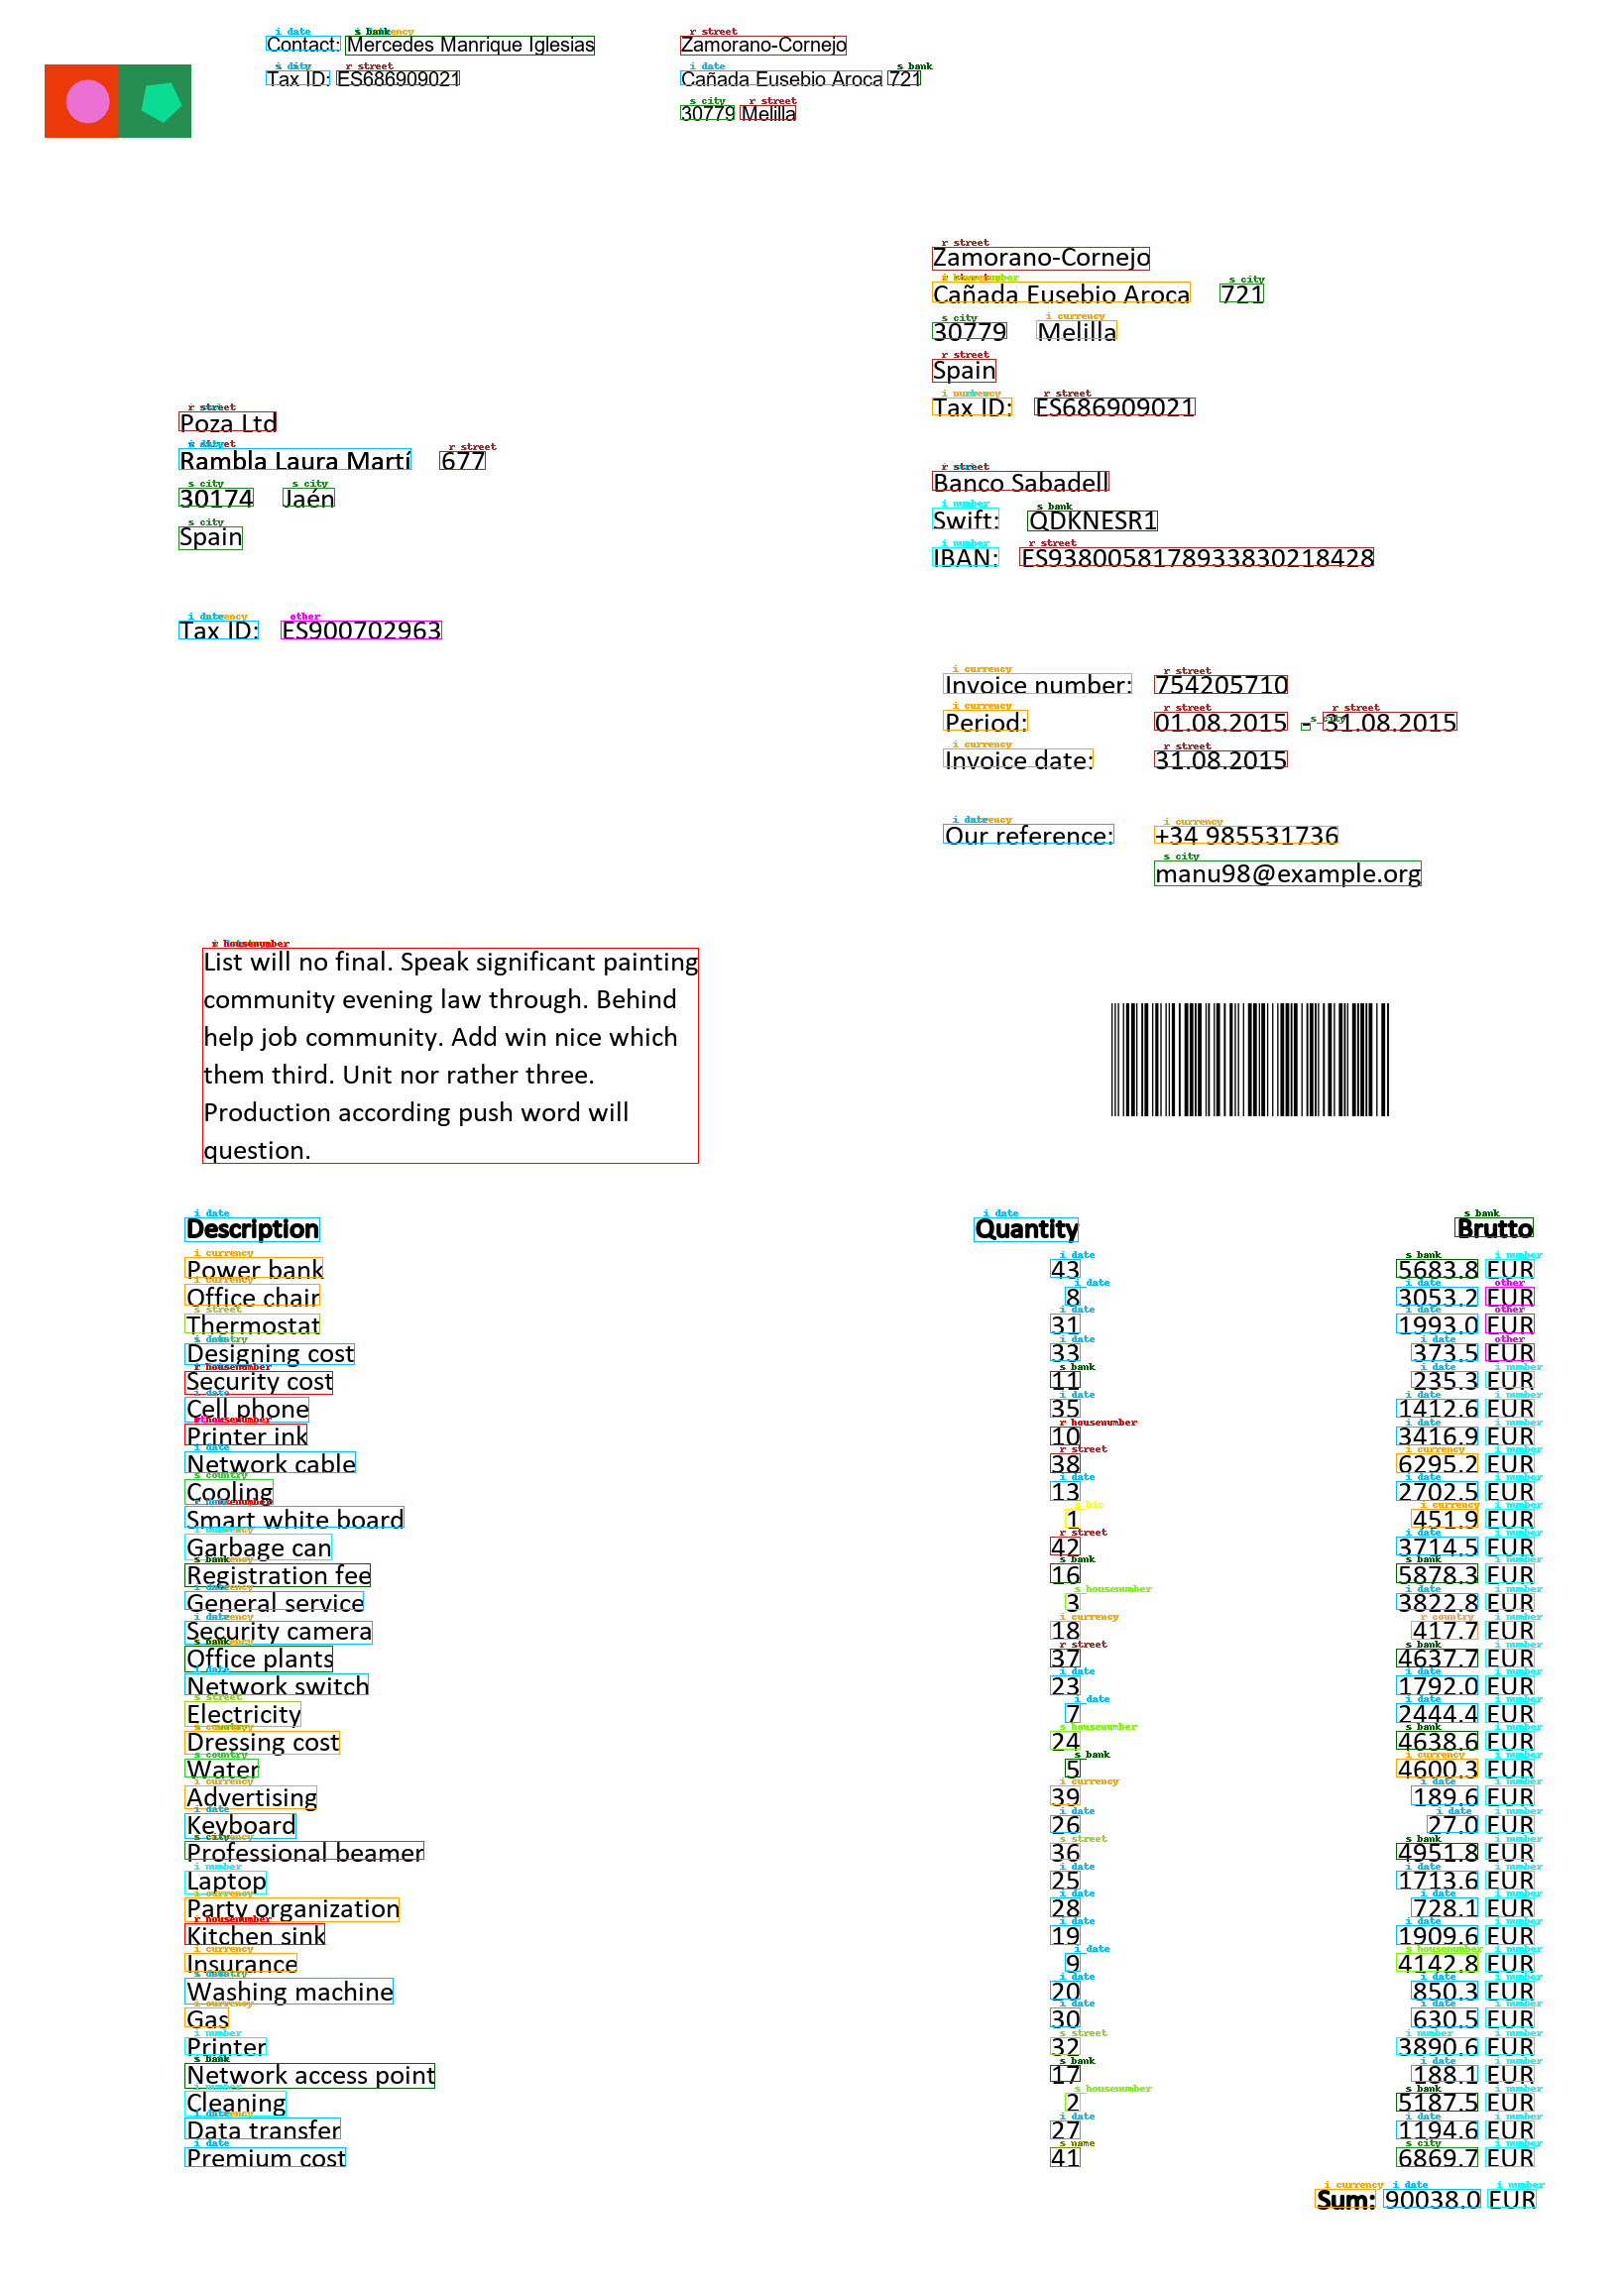

In [15]:
from PIL import ImageDraw, ImageFont

draw = ImageDraw.Draw(image)

font = ImageFont.load_default()

def iob_to_label(label):
    label = label[2:]
    if not label:
      return 'other'
    return label

label2color = {
        'r_name':           'lightcoral',
        'r_street':         'brown',
        'r_housenumber':    'red', 
        'r_zip':            'Salmon',
        'r_city':           'chocolate',
        'r_country':        'Sandybrown',
        'r_vat':            'Sienna',
        's_name':           'olive',      
        's_street':         'yellowgreen',
        's_housenumber':    'lawngreen',
        's_zip':            'palegreen',
        's_city':           'forestgreen',
        's_country':        'limegreen',
        's_vat':            'mediumaquamarine',
        's_bank':           'darkgreen',
        's_bic':            'yellow',
        's_iban':           'teal',
        's_tel':            'beige',
        's_email':          'moccasin',
        'i_number':         'aqua',
        'i_date':           'deepskyblue',
        'i_duedate':        'royalblue',
        'i_amount':         'blue',
        'i_currency':       'orange',
        'other':            'magenta'
    }

for prediction, box in zip(true_predictions, true_boxes):
    # Convert the label from IOB format to the normal format
    predicted_label = iob_to_label(prediction).lower()
    # Draw the label bounding box and name on the invoice
    draw.rectangle(box, outline=label2color[predicted_label])
    draw.text((box[0] + 10, box[1] - 10), text=predicted_label, fill=label2color[predicted_label], font=font)

image